# 4.10 Coding Etiquette

#### The following analysis includes: 
1. Importing libraries and data set
2. Considering  any security implications that might exist for this new data.
3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
    - 3.1 Determine whether there’s a difference in spending habits between the different U.S. regions
4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
5.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
    - 5.1 Analyzing dataframe by age group 
	- 5.2 Analyzing dataframe by income 
	- 5.3 Analyzing dataframe by number of dependents
	- 5.4 Analyzing customers profile
6. Create an appropriate visualization to show the distribution of profiles.
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compare your customer profiles with regions and departments.
9. Produce suitable charts to illustrate your results and export them in your project folder.
    - 9.1 Exporting dataframes
    - 9.2 Exporting charts 

### 1. Importing libraries and data set

In [7]:
# Importing libraries 
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Defining path 
path = r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\5. Python\Instacart Basket Analysis 01 - 2023 final'

In [9]:
# Importing files 
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_customers_merge.pkl'))
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [10]:
#Checkind dataset shape 
df_merged.shape

(32404859, 30)

### 2. Considering  any security implications that might exist for this new data.

In [11]:
#Checking columns and dataset structure
df_merged.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,all_name
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen
9,2550362,1,10,4,8,30.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,Linda-Nguyen


In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  max_order               int64   
 15  loyalty_flag            object  
 16  avg_price               float64 
 17  spender_criteria        object  
 18  frequency_order_median  float64 
 19  frequency               object  
 20  name                    object  
 21  last_n

The name and last name might be considred as a security concern, this columns will be dropped from the dataframe. 

In [13]:
df_merged2 = df_merged.drop(columns = ['name', 'last_name', 'all_name'])

In [14]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  max_order               int64   
 15  loyalty_flag            object  
 16  avg_price               float64 
 17  spender_criteria        object  
 18  frequency_order_median  float64 
 19  frequency               object  
 20  gender                  object  
 21  state 

### 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [15]:
# Count of the data by state
df_merged2['state'].value_counts()

California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
Delaware

In [16]:
# Defining regions by states 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'] 

In [17]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [18]:
South  = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [19]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [20]:
# Creating if statement using - loc for assigning regions to the states
df_merged2.loc[df_merged2['state'].isin(Northeast), 'region'] = 'Northeast'

In [21]:
df_merged2.loc[df_merged2['state'].isin(Midwest), 'region'] = 'Midwest'

In [22]:
df_merged2.loc[df_merged2['state'].isin(South), 'region'] = 'South'

In [23]:
df_merged2.loc[df_merged2['state'].isin(West), 'region'] = 'West'

In [24]:
# Checking values of new column - region
df_merged2['region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
NaN           1775118
Name: region, dtype: int64

#### 3.1 Determine whether there’s a difference in spending habits between the different U.S. regions

In [25]:
crosstab_spender = pd.crosstab(df_merged2['region'], df_merged2['spender_criteria'], dropna = False)

In [26]:
crosstab_spender

spender_criteria,High spender,Low spender
region,,
Midwest,7169525,7399
Northeast,5416600,5425
South,10189564,9418
West,7823755,8055


The amount of money spent varies by region. According to the data it is the South area which has a bigger number of high spenders. 

### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [27]:
df_merged2['max_order']

0           10
1           10
2           10
3           10
4           10
            ..
32404854    26
32404855     4
32404856     4
32404857     4
32404858     4
Name: max_order, Length: 32404859, dtype: int64

In [28]:
# Creating a flag for low - activity customers
df_merged2.loc[df_merged2['max_order'] < 5, 'exclusion_flag'] = 'low-activity'
df_merged2.loc[df_merged2['max_order'] >= 5, 'exclusion_flag'] = 'high-activity'

In [29]:
df_merged2['exclusion_flag'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: exclusion_flag, dtype: int64

In [30]:
#Excluding low activity customers 
df_new = df_merged2.loc[df_merged2['exclusion_flag'] == 'high-activity']

In [31]:
df_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high-activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high-activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high-activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high-activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high-activity


In [32]:
df_new.shape

(30964564, 29)

In [33]:
df_merged2.shape

(32404859, 29)

In [34]:
#Exporting data frame with high activity customers 
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_df.pkl'))

### 5.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [35]:
#Defining file that will be evaluated, high activity customers dataframe 
df_customers = df_new

In [36]:
df_customers.shape

(30964564, 29)

In [37]:
df_customers['age'].describe()

count    2.927094e+07
mean     4.947596e+01
std      1.847853e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### 5.1 Analyzing dataframe by age group 

In [38]:
df_customers.loc[(df_customers['age'] < 24, 'age_group')] = 'Youth'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\3155389410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[(df_customers['age'] < 24, 'age_group')] = 'Youth'


In [39]:
df_customers.loc[(df_customers['age'] >= 24) & (df_customers['age'] < 64), 'age_group'] = 'Adults'

In [40]:
df_customers.loc[(df_customers['age'] >= 64), 'age_group'] = 'Seniors'

In [41]:
#Validating new column 
df_customers['age_group'].value_counts(dropna = False)

Adults     18278466
Seniors     8215291
Youth       2777181
NaN         1693626
Name: age_group, dtype: int64

#### 5.2 Analyzing dataframe by income 

In [43]:
# Defining cateogries by analyzing the income 
df_customers['income'].describe()

count    2.927094e+07
mean     9.969692e+04
std      4.314845e+04
min      2.590300e+04
25%      6.736700e+04
50%      9.676300e+04
75%      1.281390e+05
max      5.939010e+05
Name: income, dtype: float64

In [44]:
df_customers['income'].mean()

99696.91521337649

Min income = 25.9 K
Max income = 593.9 K 
Avg income = 99 K
std income = 43 k

In [45]:
df_customers['income'].std()

43148.45451986873

Categories: 
Low income < 80k
Medium >= 80  & < 150
High >=150

In [46]:
df_customers.loc[df_customers['income'] < 80000, 'income_category'] = 'Low income'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\2641076060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['income'] < 80000, 'income_category'] = 'Low income'


In [47]:
df_customers.loc[(df_customers['income'] >= 80000) & (df_customers['income'] < 150000), 'income_category'] = 'Middle income'

In [48]:
df_customers.loc[(df_customers['income'] >= 150000), 'income_category'] = 'High income'

In [49]:
#Checking the new column 
df_customers['income_category'].value_counts(dropna = False)

Middle income    15217556
Low income       10379426
High income       3673956
NaN               1693626
Name: income_category, dtype: int64

#### 5.3 Analyzing dataframe by number of dependents

In [50]:
# Defining categories by analyzing variable 
df_customers['n_dependants'].describe()

count    2.927094e+07
mean     1.501600e+00
std      1.118496e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

The previous details of the 'd=n_dependants' show that the minimum quantity of dependents is 1 and the maximium is 3. 
The groups that will be considered are: 
No dependants = 0 
Medium = 1 -2 
Large = 3 

In [51]:
#Creating groups 
df_customers.loc[(df_customers['n_dependants'] == 0), 'dependents'] = 'No dependents'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\4184110722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[(df_customers['n_dependants'] == 0), 'dependents'] = 'No dependents'


In [52]:
df_customers.loc[(df_customers['n_dependants'] == 1), 'dependents'] = 'Medium'

In [53]:
df_customers.loc[(df_customers['n_dependants'] == 2), 'dependents'] = 'Medium'

In [54]:
df_customers.loc[(df_customers['n_dependants'] == 3.0), 'dependents'] = 'Large'

In [55]:
df_customers['dependents'].value_counts(dropna = False)

Medium           14620323
Large             7338095
No dependents     7312520
NaN               1693626
Name: dependents, dtype: int64

In [56]:
# Relationship between number of dependents and status
status_depen_crosstab = pd.crosstab(df_customers['n_dependants'], df_customers['fam_status'], dropna = False)


In [57]:
status_depen_crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0.0,2510623,0,0,4801897
1.0,0,487250,6814428,0
2.0,0,457728,6860917,0
3.0,0,460162,6877933,0


In [58]:
#Relationship between number of dependents and spender criteria 
spender_depen_crosstab = pd.crosstab(df_customers['n_dependants'], df_customers['spender_criteria'], dropna = False)

In [59]:
spender_depen_crosstab

spender_criteria,High spender,Low spender
n_dependants,,
0.0,7306905,5615
1.0,7296831,4847
2.0,7313669,4976
3.0,7332633,5462


According to the previous table, it doest look like there is a strong relationship between the number od dependents and how much money the person spends since in all the number of dependents the number of high spenders is similar. 

#### 5.4 Analyzing customers profile

In [60]:
# Checing the table departments
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
#Replacing Unnamed by departind_id 
df_departments.rename(columns={"Unnamed: 0":"department_id"}, inplace = True )

In [62]:
#Determining the departments table as dictionary 
depart_dict = dict(zip(df_departments["department_id"], df_departments["department"]))
depart_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [63]:
df_customers['department'] = df_customers['department_id'].map(depart_dict)

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\2926802647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['department'] = df_customers['department_id'].map(depart_dict)


In [64]:
df_customers['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [65]:
# Analyzing customers that are parents
df_customers.loc[df_customers['department'] == 'babies', 'parents'] = 'Yes'
df_customers.loc[df_customers['department'] != 'babies', 'parents'] = 'No'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\3146668238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['department'] == 'babies', 'parents'] = 'Yes'


In [66]:
df_customers['parents'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: parents, dtype: int64

In [67]:
# Analyzing customers that prefer canned goods 
df_customers.loc[df_customers['department'] == 'canned goods', 'canned_food'] = 'Yes'
df_customers.loc[df_customers['department'] != 'canned goods', 'canned_food'] = 'No'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\3886850456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['department'] == 'canned goods', 'canned_food'] = 'Yes'


In [68]:
df_customers['canned_food'].value_counts(dropna = False)

No     29952490
Yes     1012074
Name: canned_food, dtype: int64

In [69]:
# Analyzing customers that take alcohol 
df_customers.loc[df_customers['department'] == 'alcohol', 'alcohol_intake'] = 'Yes'
df_customers.loc[df_customers['department'] != 'alcohol', 'alcohol_intake'] = 'No'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\4228589597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['department'] == 'alcohol', 'alcohol_intake'] = 'Yes'


In [70]:
df_customers['alcohol_intake'].value_counts(dropna= False)

No     30819937
Yes      144627
Name: alcohol_intake, dtype: int64

In [71]:
#Analyzing purchases by day of the week 
df_customers['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    5908610
1    5411686
2    4024706
3    3669535
4    3624994
5    4033729
6    4291304
Name: orders_day_of_week, dtype: int64

In [72]:
df_customers.loc[(df_customers['orders_day_of_week'] > 0) & (df_customers['orders_day_of_week'] <3), 'time_of_week'] = 'Beginning of the_week'
df_customers.loc[(df_customers['orders_day_of_week'] >= 3) & (df_customers['orders_day_of_week'] <5), 'time_of_week'] = 'Middle of the week'
df_customers.loc[(df_customers['orders_day_of_week'] >= 5), 'time_of_week'] = 'End of the week'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_29808\122862708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[(df_customers['orders_day_of_week'] > 0) & (df_customers['orders_day_of_week'] <3), 'time_of_week'] = 'Beginning of the_week'


In [73]:
df_customers['time_of_week'].value_counts(dropna = False )

Beginning of the_week    9436392
End of the week          8325033
Middle of the week       7294529
NaN                      5908610
Name: time_of_week, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Number of customers')

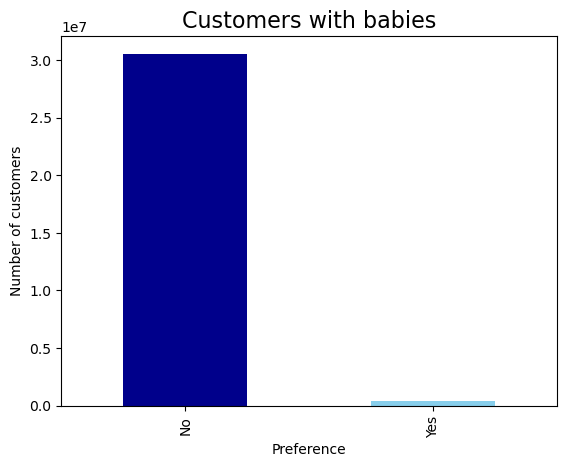

In [74]:
#Creating a bar for customers that have babies 
parents_bar = df_customers['parents'].value_counts().plot.bar(color =['darkblue','skyblue'])
plt.title("Customers with babies", fontsize = '16')
plt.xlabel("Preference")
plt.ylabel("Number of customers")

Text(0.5, 1.0, 'Frequency of order by loyalty group')

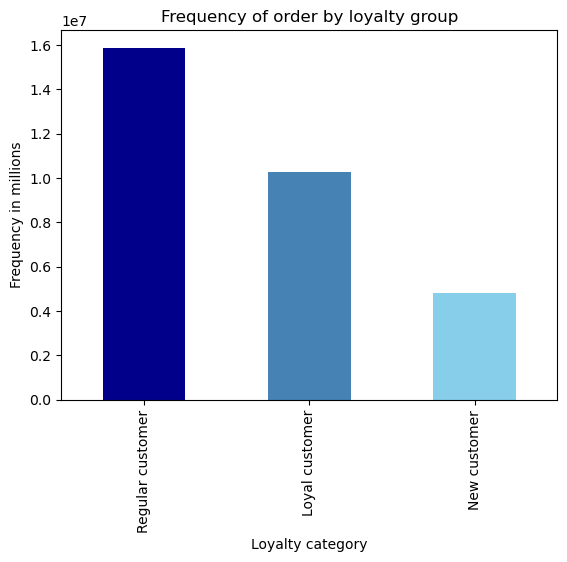

In [76]:
# Analyzing customers by loyalty 
bar_loyalty = df_customers['loyalty_flag'].value_counts().plot.bar(color= ['darkblue', 'steelblue','skyblue'])
plt.xlabel('Loyalty category')
plt.ylabel('Frequency in millions')
plt.title('Frequency of order by loyalty group')

Text(0.5, 1.0, 'Orders distribution by familisy status')

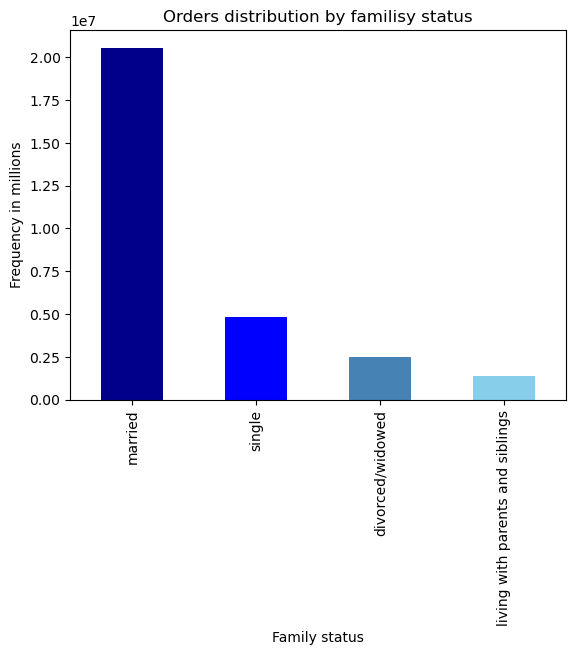

In [109]:
# Creating bar chart for customers by family status 
bar_fam_status = df_customers['fam_status'].value_counts().plot.bar(color = ['darkblue', 'blue', 'steelblue', 'skyblue'])
plt.xlabel('Family status')
plt.ylabel('Frequency in millions')
plt.title ('Orders distribution by familisy status')

Text(0.5, 1.0, 'Canned food preference')

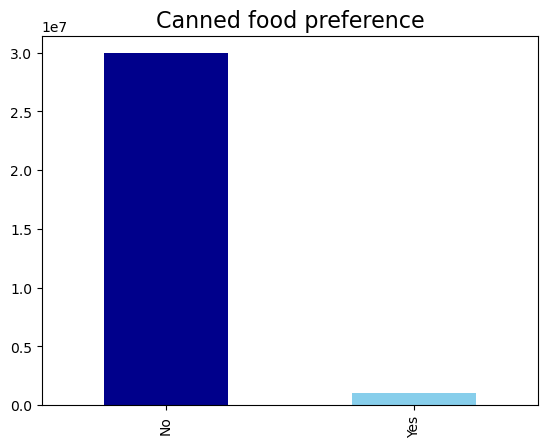

In [133]:
#Creating a bar chart for customers that prefer canned foods 
canned_foods_bar = df_customers['canned_food'].value_counts().plot.bar(color=['darkblue', 'skyblue'])
plt.title("Canned food preference", fontsize = '16')

Text(0, 0.5, 'Number of customers')

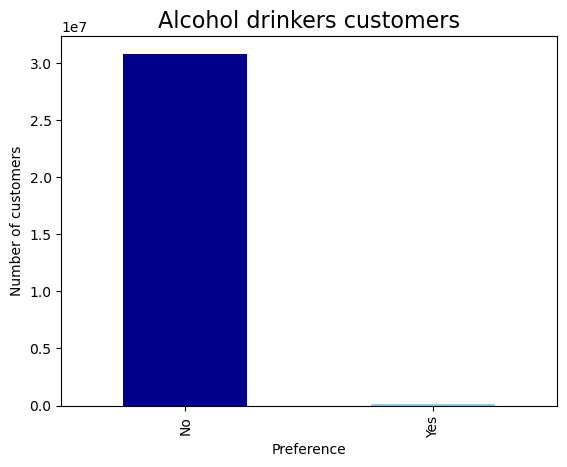

In [134]:
# Bar chart for customers that drink alcohol 
alcohol_customers_bar = df_customers['alcohol_intake'].value_counts().plot.bar(color=['darkblue', 'skyblue'])
plt.title('Alcohol drinkers customers', fontsize = '16')
plt.xlabel('Preference')
plt.ylabel('Number of customers')

Text(0, 0.5, 'Number of orders')

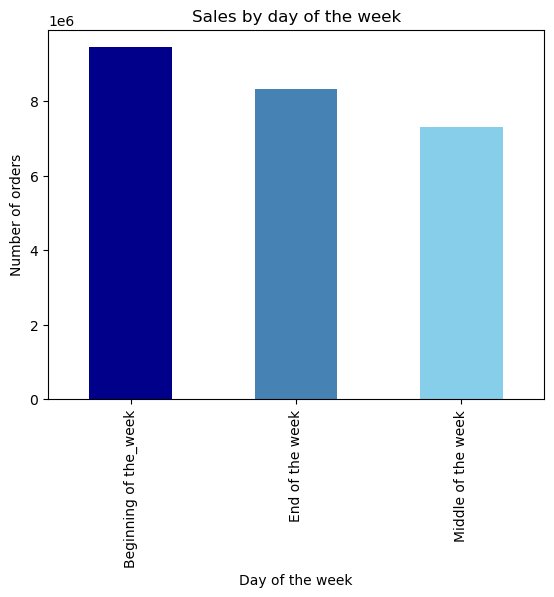

In [136]:
# Bar for analyzing the weekly behaviour of the purchases
week_purchase_bar = df_customers['time_of_week'].value_counts().plot.bar(color = ['darkblue','steelblue', 'skyblue'])
plt.title('Sales by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')

Text(0, 0.5, 'Number of customers (millions)')

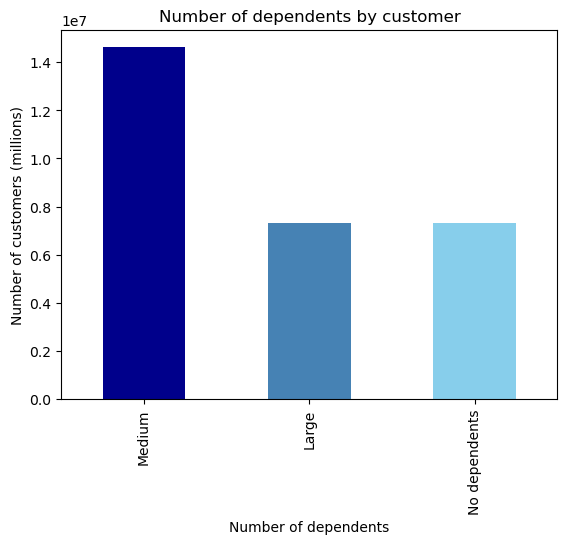

In [140]:
# Creating a chart for number of dependents by customer
no_depen_bar = df_customers['dependents'].value_counts().plot.bar(color = ['darkblue','steelblue', 'skyblue'])
plt.title('Number of dependents by customer')
plt.xlabel('Number of dependents')
plt.ylabel('Number of customers (millions)')

Text(0, 0.5, 'Number of customers (millions)')

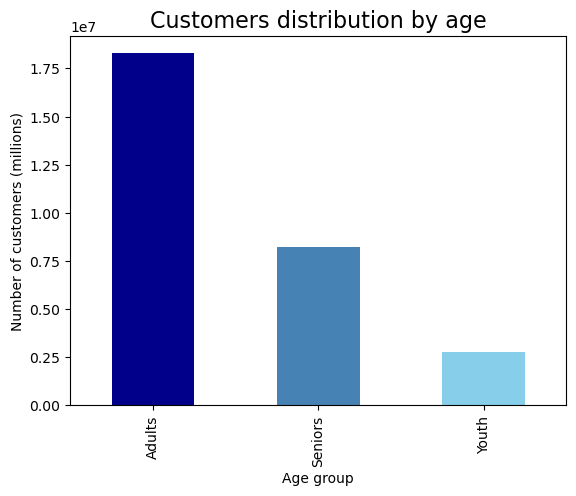

In [143]:
#Creating chart for number of customers by age
age_bar = df_customers['age_group'].value_counts().plot.bar(color = ['darkblue','steelblue', 'skyblue'])
plt.title('Customers distribution by age', fontsize = '16')
plt.xlabel('Age group')
plt.ylabel('Number of customers (millions)')


Text(0.5, 1.0, 'Orders distribution by region')

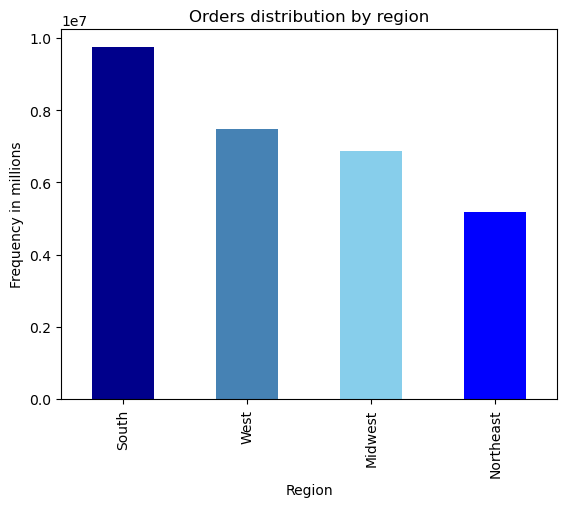

In [97]:
# Creating bar for behaviour by region 
region_bar = df_customers['region'].value_counts().plot.bar(color = ['darkblue', 'steelblue', 'skyblue', 'blue'])
plt.xlabel('Region')
plt.ylabel('Frequency in millions')
plt.title('Orders distribution by region')

Text(0, 0.5, 'Customers (millions)')

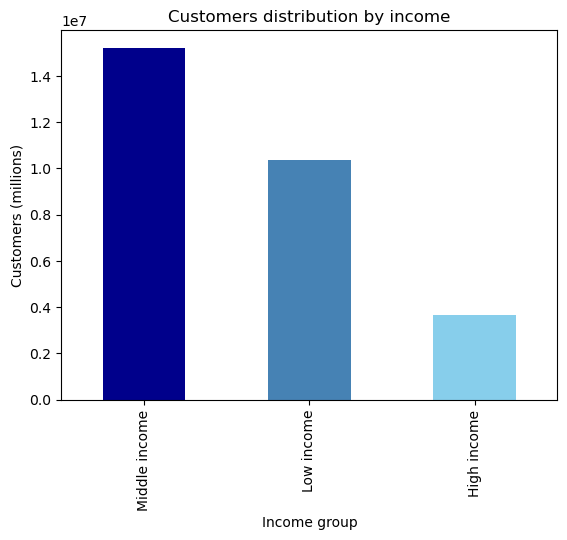

In [149]:
#Creating bar for income status 
income_bar = df_customers['income_category'].value_counts().plot.bar(color = ['darkblue','steelblue', 'skyblue'])
plt.title('Customers distribution by income')
plt.xlabel('Income group')
plt.ylabel('Customers (millions)')



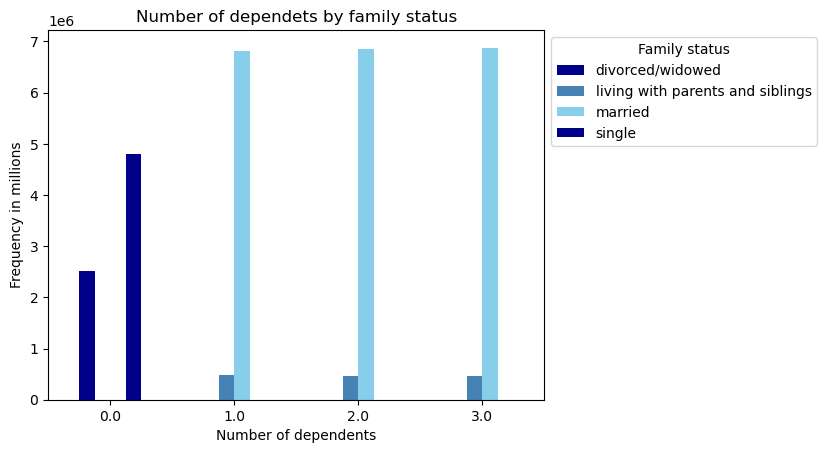

In [170]:
# Details of type of custer (high/low spender) by region
spender_crosstab_bar = status_depen_crosstab.plot(kind = 'bar', rot =0 ,color = ['darkblue','steelblue', 'skyblue'])
plt.xlabel('Number of dependents')
plt.ylabel('Frequency in millions')
plt.title ('Number of dependets by family status')
spender_crosstab_bar.legend(title='Family status', bbox_to_anchor=(1, 1), loc='upper left')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [172]:
#Analyzing orders by region
df_customers.groupby('region').agg ({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.344935  1.0  109.0
Northeast          8.383926  1.0  145.0
South              8.373722  1.0  137.0
West               8.362514  1.0  114.0

In [173]:
#Analyzing income by region
df_customers.groupby('region').agg ({'income': ['mean', 'min','max']})

income                   
                    mean      min       max
region                                     
Midwest    100569.124970  25903.0  579397.0
Northeast   99853.488681  26095.0  584097.0
South       99197.109927  25911.0  591089.0
West        99440.118309  25941.0  593901.0

In [192]:
# Analyzing income by income category
df_customers.groupby('income_category').agg ({'income': ['mean', 'min','max']})

income                    
                          mean       min       max
income_category                                   
High income      170485.271854  150000.0  593901.0
Low income        57423.565490   25903.0   79999.0
Middle income    111439.917678   80000.0  149999.0

In [194]:
#Analyzing amount of money spent by income category 
df_customers.groupby('income_category').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
High income      32.025381  1.0  99999.0
Low income        7.501979  1.0  14900.0
Middle income     9.979639  1.0  99999.0

In [178]:
# Anayzing group age (income)

df_customers.groupby('age_group').agg({'income': ['mean', 'min', 'max']})


income                   
                    mean      min       max
age_group                                  
Adults      96824.334942  25903.0  591089.0
Seniors    115934.118857  29001.0  593901.0
Youth       70571.340708  25972.0  396364.0

In [190]:
# Analyzing orders frequency by age group
df_customers.groupby('age_group').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
age_group                              
Adults             8.386784  1.0  145.0
Seniors            8.324074  1.0   99.0
Youth              8.352326  1.0  109.0

In [110]:
#Analyzing orders frequency by fam status 
df_customers.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
fam_status                                               
divorced/widowed                  11.586535  1.0  99999.0
living with parents and siblings  11.021116  1.0  99999.0
married                           11.834829  1.0  99999.0
single                            12.405856  1.0  99999.0

In [78]:
#Analyzing orders frequency by loyalty group
df_customers.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.026656  0.0  30.0
New customer                  17.598691  0.0  30.0
Regular customer              12.155135  0.0  30.0

In [185]:
# Analyzing income by low and high spenders 
df_customers.groupby('spender_criteria').agg({'income':['mean', 'min', 'max']})

income                   
                          mean      min       max
spender_criteria                                 
High spender      99735.043661  25911.0  593901.0
Low spender       46335.262392  25903.0  165800.0

In [188]:
# Analyzing low and high spenders by prices
df_customers.groupby('spender_criteria').agg({'prices':['mean', 'min', 'max']})

prices              
                       mean  min      max
spender_criteria                         
High spender      11.938510  1.0  99999.0
Low spender        4.864435  1.0      9.9

In [189]:
# Analyzing money spent by day of the week
df_customers.groupby('time_of_week').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
time_of_week                                  
Beginning of the_week  12.218629  1.0  99999.0
End of the week        12.045015  1.0  99999.0
Middle of the week     12.088497  1.0  99999.0

In [119]:
#Analzing money spent by customer with babies 
df_customers.groupby('parents').agg({'prices': ['mean', 'min', 'max']})

prices              
              mean  min      max
parents                         
No       11.991265  1.0  99999.0
Yes       7.634399  1.0     15.0

In [120]:
#Analyzing money spent by customers that drink alcohol 
df_customers.groupby('alcohol_intake').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_intake                         
No              11.951273  1.0  99999.0
Yes              8.150699  1.0     15.0

### 8. Compare your customer profiles with regions and departments.

In [106]:
#Analyzing income category by region 
crosstab_income_cat_regions = pd.crosstab(df_customers['region'], df_customers ['income_category'], dropna = False)
crosstab_income_cat_regions

income_category,High income,Low income,Middle income
region,,,
Midwest,871060,2394249,3594546
Northeast,645072,1805853,2727119
South,1212508,3496154,5038268
West,945316,2683170,3857623


Text(0.5, 0, 'Region')

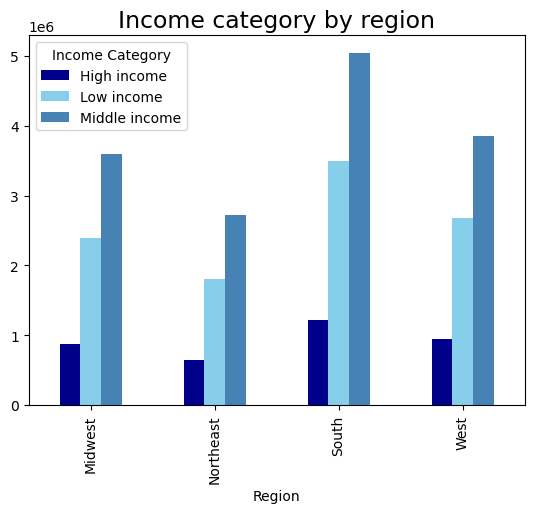

In [107]:
# Visualization income category by region 
crosstab_income_cat_regions_bar = crosstab_income_cat_regions.plot(kind = 'bar', color = ['darkblue', 'skyblue', 'steelblue'])
crosstab_income_cat_regions_bar.legend(title = 'Income Category')
plt.title('Income category by region', fontsize = '17')
plt.xlabel('Region')

In [80]:
#Analyzing products by price range 
df_customers.loc[df_customers['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_customers.loc[(df_customers['prices'] <= 15) & (df_customers['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df_customers.loc[df_customers['prices'] <= 5, 'price_range_loc'] = 'Low-range product'
df_customers['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [201]:
#Analyzing number of dependents by region 
crosstab_dependents_region = pd.crosstab(df_customers['region'], df_customers['dependents'], dropna = False)
crosstab_dependents_region

dependents,Large,Medium,No dependents
region,,,
Midwest,1680590,3452475,1726790
Northeast,1302945,2595141,1279958
South,2442649,4871158,2433123
West,1911911,3701549,1872649


In [203]:
# Analyzing low or high spender by region 
crosstab_spender_region = pd.crosstab(df_customers['region'], df_customers ['spender_criteria'], dropna = False)
crosstab_spender_region

spender_criteria,High spender,Low spender
region,,
Midwest,6854600,5255
Northeast,5174373,3671
South,9740492,6438
West,7480573,5536


Text(0.5, 0, 'Region')

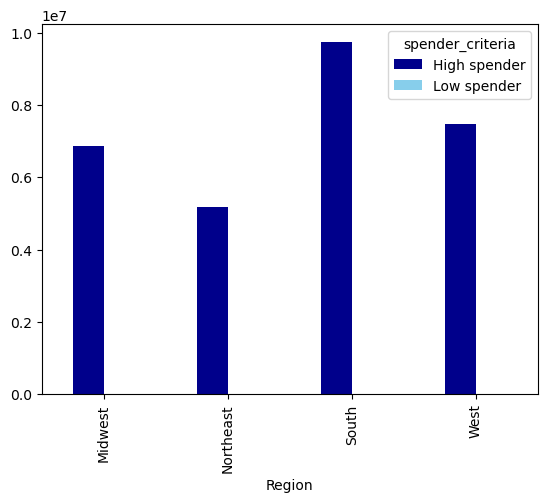

In [227]:
# Visualization low and high spender by region 
crosstab_spender_region_bar = crosstab_spender_region.plot(kind = 'bar', color =['darkblue', 'skyblue'])
plt.xlabel('Region')

According to the records the majority of the clients are considered as high spenders and it is the South region with the highest number of high spenders

In [98]:
#Analyzing department products by region 
crosstab_region_department = pd.crosstab(df_customers['department'], df_customers['region'], dropna = False)
crosstab_region_department

region,Midwest,Northeast,South,West
department,,,,
alcohol,32809,23805,46367,34961
babies,90056,69339,131171,97173
bakery,247653,188898,350623,272652
beverages,565552,437983,811743,615379
breakfast,147529,111207,209970,164049
bulk,7491,5252,10510,8307
canned goods,224414,167994,319004,245420
dairy eggs,1144827,863968,1628966,1254379
deli,221848,168674,315367,242910


Text(0.5, 1.0, 'Orders distribution grouped by region and department')

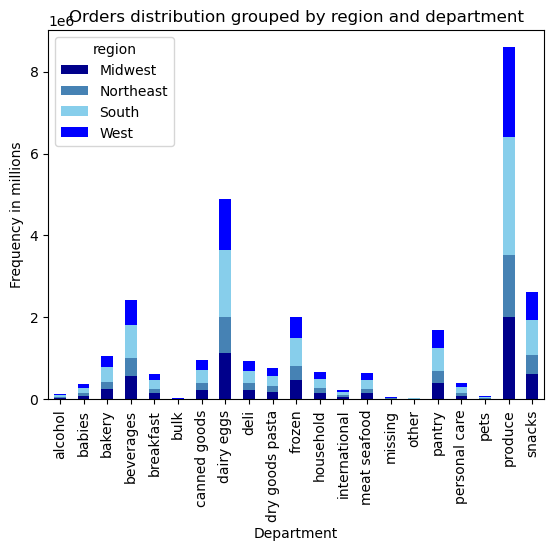

In [103]:
bar_ctab_region_depart = crosstab_region_department.plot(kind = 'bar', stacked = True,color = ['darkblue', 'steelblue', 'skyblue','blue'] )
plt.xlabel('Department')
plt.ylabel('Frequency in millions')
plt.title('Orders distribution grouped by region and department')

In [84]:
# Analyzing departemt products by loyalty category
crosstab_loyalty_department = pd.crosstab(df_customers['department'], df_customers ['loyalty_flag'], dropna = False)
crosstab_loyalty_department 

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


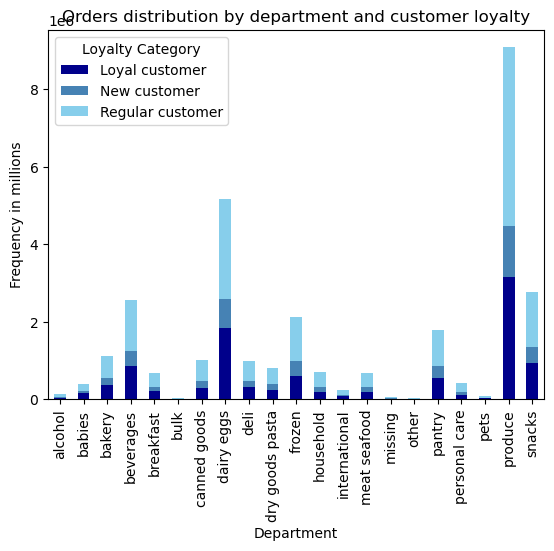

In [94]:
#Visualization of crosstab_loyalty_department 

bar_crosstab_loyalty_department = crosstab_loyalty_department.plot(kind = 'bar', stacked = True, color = ['darkblue', 'steelblue', 'skyblue'])
plt.xlabel('Department')
plt.ylabel('Frequency in millions')
plt.title('Orders distribution by department and customer loyalty')
plt.legend(title = 'Loyalty Category')

In [205]:
# Analyzing age groups by region 
crosstab_age_regions = pd.crosstab(df_customers['region'], df_customers ['age_group'], dropna = False)
crosstab_age_regions

age_group,Adults,Seniors,Youth
region,,,
Midwest,4294534,1915910,649411
Northeast,3189032,1491486,497526
South,6093503,2706912,946515
West,4701397,2100983,683729


Text(0.5, 0, 'Region')

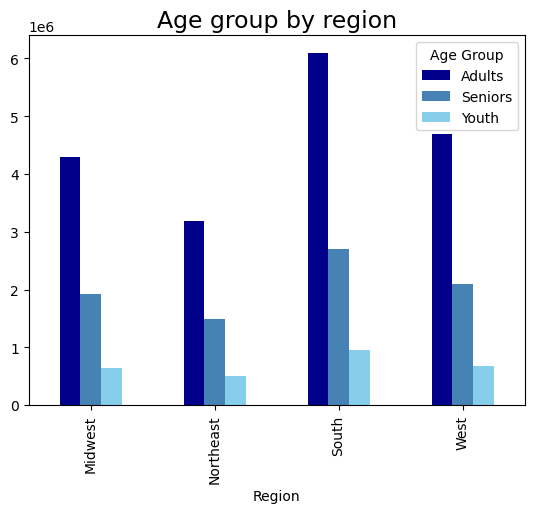

In [226]:
# Age group by region chart 
crosstab_age_regions_groups = crosstab_age_regions.plot(kind = 'bar', color =['darkblue','steelblue', 'skyblue'])
crosstab_age_regions_groups.legend(title = 'Age Group')
plt.title ('Age group by region', fontsize = '17')
plt.xlabel('Region')

The age behaviour in each of the regions is very similar. In general the groups that are more common in getting items in the stores are Adults and the group age less common are young people. 

In [229]:
#Analyzing age group by departments 
crosstab_age_departments = pd.crosstab(df_customers['department'], df_customers['age_group'], dropna = False)
crosstab_age_departments

age_group,Adults,Seniors,Youth
department,,,
alcohol,86590,36492,14860
babies,244888,106629,36222
bakery,662790,296922,100114
beverages,1516632,686799,227226
breakfast,395531,175671,61553
bulk,19635,8819,3106
canned goods,599352,267346,90134
dairy eggs,3054116,1371849,466175
deli,592616,266712,89471


Text(0, 0.5, 'Frequency in millions')

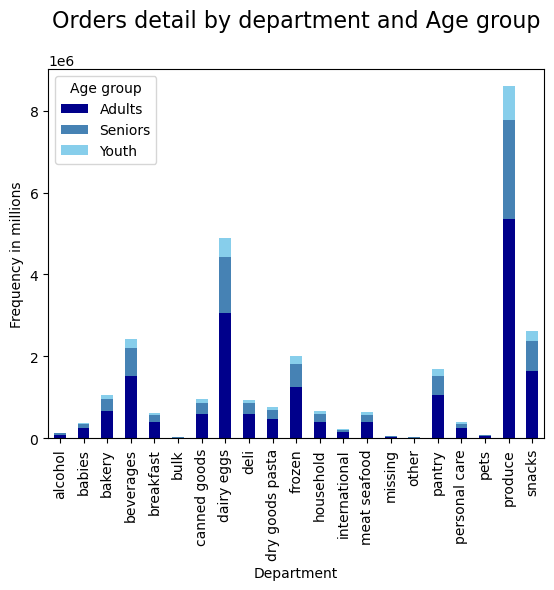

In [240]:
# Visualization of the age group in department 
crosstab_age_dept_bar = crosstab_age_departments.plot(kind = 'bar', stacked = True, color = ['darkblue', 'steelblue','skyblue' ])
crosstab_age_dept_bar.legend (title = 'Age group')
plt.title('Orders detail by department and Age group', fontsize = '16', pad = '30')
plt.xlabel('Department')
plt.ylabel('Frequency in millions')

In this chart we can esily see as in the previous analysis that Adults are the main type of customers that go to the stores, and the majoroty gets produce products. In general, the bars can let us conclude that produce products are the most common ones. 

In [251]:
#Analyzing income category by department 
crosstab_income_depart = pd.crosstab(df_customers['department'], df_customers ['income_category'], dropna = False)
crosstab_income_depart 

income_category,High income,Low income,Middle income
department,,,
alcohol,22568,47746,67628
babies,50028,122222,215489
bakery,139707,360394,559725
beverages,295786,940744,1194127
breakfast,78950,240483,313322
bulk,3439,12539,15582
canned goods,124468,313500,518864
dairy eggs,622829,1683451,2585860
deli,118698,334377,495724


Text(0.5, 0, 'Department')

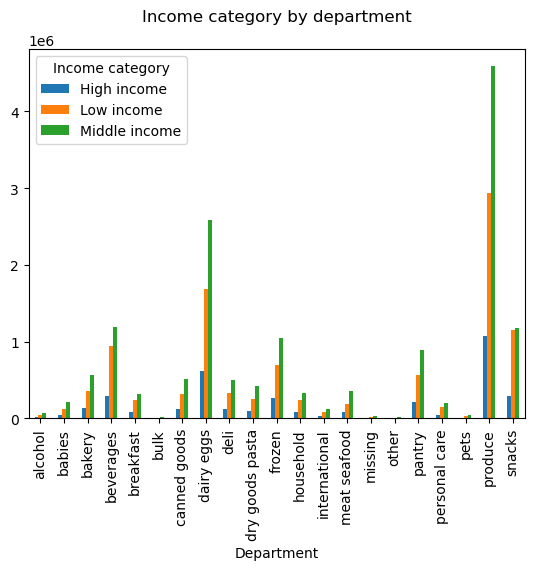

In [258]:
#Creating visualization of income category by department 
crosstab_income_depart_bar =crosstab_income_depart.plot(kind = 'bar')
crosstab_income_depart_bar.legend(title = 'Income category')
plt.title ('Income category by department', pad =20)
plt.xlabel('Department')

In this chart we can easily see that the produce products are the favorite one and is the middle income group who get these products with a higher frequency. 

In [114]:
#Analyzing orders by department and family status 
crosstab_fam_department = pd.crosstab(df_customers['department'], df_customers['fam_status'], dropna = False)
crosstab_fam_department

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11252,8222,94528,23940
babies,32765,18233,271803,64938
bakery,90881,50998,742449,175498
beverages,209866,114034,1706279,400478
breakfast,53807,31330,443931,103687
bulk,2531,1525,22485,5019
canned goods,79967,45977,673474,157414
dairy eggs,419832,236749,3433939,801620
deli,82234,45412,664339,156814


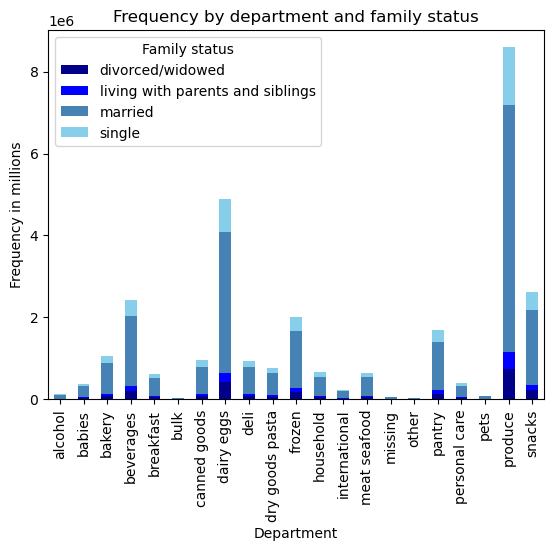

In [118]:
#Creating bar chart for department and family status 
bar_crosstab_family_depart = crosstab_fam_department.plot(kind = 'bar', stacked = True, color = ['darkblue', 'blue', 'steelblue', 'skyblue'])
plt.xlabel('Department')
plt.ylabel('Frequency in millions')
plt.title ('Frequency by department and family status')
plt.legend(title = 'Family status')

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

#### 9.1 Exporting dataframes

In [261]:
# Exporting dataframes 
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers.pkl'))
df_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customers_final.pkl'))

#### 9.2 Exporting charts 

In [263]:
# Exporting Bar for Customers with babies 
parents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_babies_bar.png'))

In [265]:
# Exporting Customers that preferred canned foods 
canned_foods_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'canned_food_bar.png'))

In [270]:
# Exporting bar of Customers that take alcohol 
alcohol_customers_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_consumption_bar.png'))

In [271]:
# Exporting bar about Week of purchase 
week_purchase_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'week_of_purchase_bar.png'))

In [273]:
# Exporting bar about number of dependents s
no_depen_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'no_dependents_bar.png'))

In [274]:
# Exporting age bar 
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar.png'))

In [275]:
# Exporting bar about income category 
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_bar.png'))

In [276]:
# Exporting bar about spender criteria by region
spender_crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_criteria_by_region.png'))

In [277]:
# Exporting bar about income category by region 
crosstab_income_cat_regions_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_cat_region.png'))

In [278]:
# Exporting low and high spender bar by region 
crosstab_spender_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_crite_region.png'))

In [279]:
# Exporting bar by age group and region 
crosstab_age_regions_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region.png'))

In [280]:
# Exporting details by department and age group 
crosstab_age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department.png'))

In [281]:
# Exporting details by income category and department 
crosstab_income_depart_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_department.png'))